### Finding and Drawing Contours.

-SOURCE: https://youtu.be/_aTC-Rc4Io0

In [2]:
import cv2
import numpy as np

vidobj=cv2.VideoCapture(0)

while True:
    _,frame=vidobj.read()
    # Returns two output.
    blurred_frame=cv2.GaussianBlur(frame,(5,5),0)
    #To remove the noise from the frames.
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    hsv1 = cv2.cvtColor(blurred_frame, cv2.COLOR_BGR2HSV)
    
    lower_white=np.array([38,86,0])
    upper_white=np.array([121,255,255])
    
    mask=cv2.inRange(hsv,lower_white,upper_white)
    mask1=cv2.inRange(hsv1,lower_white,upper_white)
    
    # Lets draw contours:
    _,contours,_=cv2.findContours(mask,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
    cv2.drawContours(blurred_frame,contours,-1,(0,255,0),3)
    
    
    cv2.imshow("Frame",frame)
    cv2.imshow("mask",mask)
    cv2.imshow("New_Frame",mask1)
    k=cv2.waitKey(1) 
    if k==27:
        break
vidobj.release()
cv2.destroyAllWindows()



**Contours are not plotting**

**Need to complete this**

#### Drawing on an image:

- Effort to draw a rectangle on a image in order to make guidelines for the guy to put the delivery slip inside it.
- Will draw both (Vertical & Horizontal dominating) rectangle, To cover all types of delivery slip. 


In [36]:
import cv2
import numpy

img=cv2.imread("frame114.jpg",1)
# (image,coordinates, width and height, color(BGR),width of line)
cv2.rectangle(img, (100,0),(400,450),(255,255,255),2)  # Vertical dominating.
cv2.rectangle(img, (0,100),(650,400),(255,255,255),2)   # Horizontal dominating.
cv2.imshow("a",img)
cv2.waitKey(10000)
cv2.destroyAllWindows()




### Drawing on a real time video!

In [39]:
import cv2
import numpy
vidobj=cv2.VideoCapture(0)


while True:
    _,frame= vidobj.read()
    cv2.rectangle(frame, (100,0),(600,650),(255,255,255),2)  # Vertical dominating.
    #cv2.rectangle(frame, (0,100),(650,400),(255,255,255),2)   # Horizontal dominating.
    cv2.imshow("frame",frame)
    k=cv2.waitKey(1)
    if k==27:
        break
vidobj.release()
cv2.destroyAllWindows()

### Hough Line Transform!!

- Documentation:https://docs.opencv.org/2.4/doc/tutorials/imgproc/imgtrans/hough_lines/hough_lines.html
- Implementation in python: https://www.youtube.com/watch?v=RFmsQeku4dE
- Canny edge detection: https://docs.opencv.org/3.4/da/d22/tutorial_py_canny.html
- Implement docs: https://www.geeksforgeeks.org/line-detection-python-opencv-houghline-method/

In [9]:
import cv2
import numpy as np

img=cv2.imread("rec_enhanced.jpeg")
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edge=cv2.Canny(gray,50,150)

#cv2.imshow("a",img)
#cv2.imshow("b",gray)
cv2.imshow("c",edge)
#lines = cv2.HoughLines(edges,1,np.pi/180, 200)
lines=cv2.HoughLines(edge,1,np.pi/180,200)
for r,theta in lines[0]: 
      
    # Stores the value of cos(theta) in a 
    a = np.cos(theta) 
  
    # Stores the value of sin(theta) in b 
    b = np.sin(theta) 
      
    # x0 stores the value rcos(theta) 
    x0 = a*r 
      
    # y0 stores the value rsin(theta) 
    y0 = b*r 
      
    # x1 stores the rounded off value of (rcos(theta)-1000sin(theta)) 
    x1 = int(x0 + 1000*(-b)) 
      
    # y1 stores the rounded off value of (rsin(theta)+1000cos(theta)) 
    y1 = int(y0 + 1000*(a)) 
  
    # x2 stores the rounded off value of (rcos(theta)+1000sin(theta)) 
    x2 = int(x0 - 1000*(-b)) 
      
    # y2 stores the rounded off value of (rsin(theta)-1000cos(theta)) 
    y2 = int(y0 - 1000*(a)) 
      
    # cv2.line draws a line in img from the point(x1,y1) to (x2,y2). 
    # (0,0,255) denotes the colour of the line to be  
    #drawn. In this case, it is red.  
    cv2.line(img,(x1,y1), (x2,y2), (0,255,0),5) 
      
# All the changes made in the input image are finally 
# written on a new image houghlines.jpg 

#cv2.imshow('linesDetected.jpg', img) 
#cv2.imwrite('linesDetected.jpg', img)

cv2.waitKey()
#cv2.destroyAllWindows()





-1

![](linesDetected.jpg)

- Not working Properly.

In [11]:
import cv2
import numpy as np

img=cv2.imread("sudoku.png")
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edge=cv2.Canny(gray,100,200, apertureSize=3)

# cv2.imshow("a",img)
# cv2.imshow("b",gray)
cv2.imshow("c",edge)
#lines = cv2.HoughLines(edges,1,np.pi/180, 200)
lines=cv2.HoughLines(edge,1,np.pi/180,200)
for r,theta in lines[0]: 
      
    # Stores the value of cos(theta) in a 
    a = np.cos(theta) 
  
    # Stores the value of sin(theta) in b 
    b = np.sin(theta) 
      
    # x0 stores the value rcos(theta) 
    x0 = a*r 
      
    # y0 stores the value rsin(theta) 
    y0 = b*r 
      
    # x1 stores the rounded off value of (rcos(theta)-1000sin(theta)) 
    x1 = int(x0 + 1000*(-b)) 
      
    # y1 stores the rounded off value of (rsin(theta)+1000cos(theta)) 
    y1 = int(y0 + 1000*(a)) 
  
    # x2 stores the rounded off value of (rcos(theta)+1000sin(theta)) 
    x2 = int(x0 - 1000*(-b)) 
      
    # y2 stores the rounded off value of (rsin(theta)-1000cos(theta)) 
    y2 = int(y0 - 1000*(a)) 
      
    # cv2.line draws a line in img from the point(x1,y1) to (x2,y2). 
    # (0,0,255) denotes the colour of the line to be  
    #drawn. In this case, it is red.  
    cv2.line(img,(x1,y1), (x2,y2), (0,255,0),2) 
      
# All the changes made in the input image are finally 
# written on a new image houghlines.jpg 

cv2.imshow('linesDetected.jpg', img) 
#cv2.imwrite('linesDetect1.jpg', img)

cv2.waitKey()
#cv2.destroyAllWindows()





-1

- Detecting only a single line on a pretty simple picture.
- Need to rectify this issue.

![](linesDetect.jpg)

### Let's try it on video stream!

In [2]:
import cv2
import numpy as np

#img=cv2.imread("rec_enhanced.jpeg")
vidobj=cv2.VideoCapture(0)
if vidobj.isOpened():
    ret,frame=vidobj.read()
else:
    ret=False

while ret:
    ret,frame=vidobj.read()
    
    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    edge=cv2.Canny(gray,100,200)

    lines=cv2.HoughLines(edge,1,np.pi/180,200)
    if lines is not None:
        for r,theta in lines[0]: # this will help detect lines.
            a = np.cos(theta)  
            b = np.sin(theta)  
            x0 = a*r  
            y0 = b*r  
            x1 = int(x0 + 1000*(-b)) 
            y1 = int(y0 + 1000*(a)) 
            x2 = int(x0 - 1000*(-b)) 
            y2 = int(y0 - 1000*(a))  
            cv2.line(frame,(x1,y1), (x2,y2), (0,255,0),5) 
    cv2.imshow('linesDetected.jpg', frame)
    k=cv2.waitKey(1)
    if k==27:
        break

cv2.waitKey()
vidobj.release()
cv2.destroyAllWindows()





- Works Fine on webcam, but there is a scope of improvement. 

### Tuning the Hough Line Transformation.

- This is Standard Hough Line Transformation.

In [1]:
import cv2
import numpy as np

img=cv2.imread("sudoku.png")
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edge=cv2.Canny(gray,50,100, apertureSize=3)

# cv2.imshow("a",img)
# cv2.imshow("b",gray)
#cv2.imshow("c",edge)
#lines = cv2.HoughLines(edges,1,np.pi/180, 200)
lines=cv2.HoughLines(edge,1,np.pi/180,200)
for line in lines:
    r,theta=line[0]
    a = np.cos(theta) 
    b = np.sin(theta) 
    x0 = a*r 
    y0 = b*r 
    x1 = int(x0 + 1000*(-b)) 
    y1 = int(y0 + 1000*(a)) 
    x2 = int(x0 - 1000*(-b)) 
    y2 = int(y0 - 1000*(a))  
    cv2.line(img,(x1,y1), (x2,y2), (0,255,0),2) 
#cv2.imshow('linesDetected.jpg', img) 
cv2.imwrite('linesDetect0.jpg', img)
cv2.imwrite('edge.jpg', edge)
cv2.waitKey()
#cv2.destroyAllWindows()





-1

### EDGE DETECTED!!

![](edge.jpg)

### Hough Line Transform!

![](linesDetect0.jpg)

### Now let's try on the real problem.

In [6]:
import cv2
import numpy as np

img=cv2.imread("box_original.jpeg")
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edge=cv2.Canny(gray,50,100, apertureSize=3)

# cv2.imshow("a",img)
# cv2.imshow("b",gray)
cv2.imshow("c",edge)
#lines = cv2.HoughLines(edges,1,np.pi/180, 200)
lines=cv2.HoughLines(edge,1,np.pi/180,200)
for line in lines:
    r,theta=line[0]
    a = np.cos(theta) 
    b = np.sin(theta) 
    x0 = a*r 
    y0 = b*r 
    x1 = int(x0 + 1000*(-b)) 
    y1 = int(y0 + 1000*(a)) 
    x2 = int(x0 - 1000*(-b)) 
    y2 = int(y0 - 1000*(a))  
    cv2.line(img,(x1,y1), (x2,y2), (0,255,0),2) 
#cv2.imshow('linesDetected.jpg', img) 
#cv2.imwrite('linesDetect01.jpg', img)
#cv2.imwrite('edge.jpg', edge)
cv2.waitKey()
#cv2.destroyAllWindows()





-1

### Specifying the Region Of Interest (ROI)

- SOURCE: https://youtu.be/yvfI4p6Wyvk
- Remember, the number of vertices can be more than 4 or even 3 as well.
- The shape can be anything.

(1280, 960, 3)


True

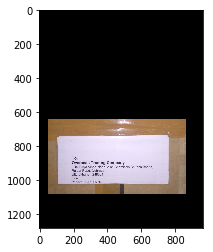

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


img=cv2.imread("box_original.jpeg")
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

# plt.imshow(img)
# plt.show
print(img.shape)

height=img.shape[0]
width=img.shape[1]

# Specifying region of interest vertices.

# Generalized Case:
# CONSTRAINT:
# Camera should be same.
# Resolution of the image should be same.
roi_vertices=[
    (50,height-200),
    (50,height/2),
    (width-100,height/2), 
    (width-100,height-200)
       
]

# Remember to specify coordinates in an order, Better will be clockwise.
# Bottom_left --> top_left --> top_right --> bottom_right.


def roi(img,vertices):
    mask=np.zeros_like(img)
    channel_count=img.shape[2]
    match_mask_color=(255,)*channel_count
    cv2.fillPoly(mask,vertices,match_mask_color)
    masked_image=cv2.bitwise_and(img,mask)
    return masked_image

cropped_image=roi(img,np.array([roi_vertices],np.int32))


plt.imshow(cropped_image)
plt.show

cv2.imwrite('ROI.jpg',cropped_image)



### OUTPUT:

- Final image:

![](ROI.jpg)

### Probabilistic Hough Line Transform.

- Important for this purpose.

In [48]:
import numpy as np
import cv2


img=cv2.imread("a.jpg")
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edge=cv2.Canny(gray,50,150,apertureSize=3)
#cv2.imwrite("Edged_after_mask.jpg",edge)


lines=cv2.HoughLinesP(edge,1,np.pi/180,200,minLineLength=50,maxLineGap=50)
for line in lines:
    x1,y1,x2,y2=line[0]
    cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)
    
cv2.imshow("Prob_hough_transform.jpg",img)
cv2.waitKey()





-1

![](Prob_hough_transform.jpg)

#### ISSUE: 

- Including the boundaries as well.
- Need to remove the boundaries from line transform.

#### Let's See the edge detection

![](Edged_after_mask.jpg)

- Not so fluent but a great Improvement.

#### Let's Combine the code:



#### REGION OF INTEREST + PROBABILISTIC HOUGH TRANSFORM.

- SOURCE: https://www.youtube.com/watch?v=G0cHyaP9HaQ&t=852s

True

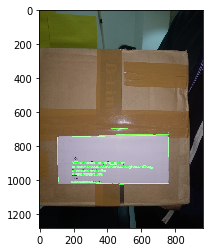

In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def roi(img,vertices):
    mask=np.zeros_like(img)
    
    #channel_count=img.shape[2]
    # No need for channel_count as we will work on grayscale image.
    #match_mask_color=(255,)*channel_count
    # No need for all these.
    
    match_mask_color=255
    cv2.fillPoly(mask,vertices,match_mask_color)
    masked_image=cv2.bitwise_and(img,mask)
    return masked_image

# A new function for drawing the lines on a blank Image of the Same Size.
# And converge the images: Blank + Original Cropped Image.

def draw_lines(img,lines):
    im=np.copy(img) 
    # This copy is only for creating the blank image and not for any other Purpose.
    # We can use same variable name as well.
    blank_image=np.zeros((im.shape[0],im.shape[1],3),dtype=np.uint8) 
    # Lines will be Drawn on a blank image.
    # The balnk Image is of same size as of the original Image.
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(blank_image,(x1,y1),(x2,y2),(0,255,0),thickness=3)
    # Now we will merge the images:
    
    img=cv2.addWeighted(img,0.8,blank_image,1,0.0)
    return img
            


img=cv2.imread("box_original.jpeg")
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)


height=img.shape[0]
width=img.shape[1]


roi_vertices=[
    (50,height-200),
    (50,height/2),
    (width-100,height/2), 
    (width-100,height-200)
       
]

# In order to remove the boundaries from detection.
gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
edge=cv2.Canny(gray,50,150,apertureSize=3)

cropped_image=roi(edge,np.array([roi_vertices],np.int32))
# Applied on grayscale and not on the original image. 

#lines=cv2.HoughLinesP(edge,1,np.pi/180,200,minLineLength=50,maxLineGap=50)


# Exact Dimensions:: 
lines=cv2.HoughLinesP(cropped_image,4,theta=np.pi/180,threshold=200,lines=np.array([]),minLineLength=20,
                     maxLineGap=50)


plt.imshow(cropped_image)
plt.show

#cv2.imwrite('ROI_Edged1.jpg',cropped_image)

image_with_lines=draw_lines(img,lines)
plt.imshow(image_with_lines)
plt.show

cv2.imwrite('Final.jpg',image_with_lines)



![](ROI_Edged1.jpg)

### OUTCOMES:

- Boundaries are not detected anymore.



### ALGORITHM:

1. Read the image
2. convert it into RGB
3. Find the vertices needed to mask.
4. Convert it into GrayScale.
5. Further use Canny edge detection to find the edges.
6. Apply the function used earlier for masking (named roi())
7. Plot the final image.

![](Final.jpg)

### Let's Try with Another Image:

-1

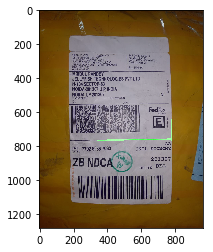

In [40]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def roi(img,vertices):
    mask=np.zeros_like(img)
    
    #channel_count=img.shape[2]
    # No need for channel_count as we will work on grayscale image.
    #match_mask_color=(255,)*channel_count
    # No need for all these.
    
    match_mask_color=255
    cv2.fillPoly(mask,vertices,match_mask_color)
    masked_image=cv2.bitwise_and(img,mask)
    return masked_image

# A new function for drawing the lines on a blank Image of the Same Size.
# And converge the images: Blank + Original Cropped Image.

def draw_lines(img,lines):
    im=np.copy(img) 
    # This copy is only for creating the blank image and not for any other Purpose.
    # We can use same variable name as well.
    blank_image=np.zeros((im.shape[0],im.shape[1],3),dtype=np.uint8) 
    # Lines will be Drawn on a blank image.
    # The balnk Image is of same size as of the original Image.
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(blank_image,(x1,y1),(x2,y2),(0,255,0),thickness=3)
    # Now we will merge the images:
    
    img=cv2.addWeighted(img,0.8,blank_image,1,0.0)
    return img
            


img=cv2.imread("rec.jpeg")
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)


height=img.shape[0]
width=img.shape[1]


roi_vertices=[
    (50,height-200),
    (50,height/2),
    (width-100,height/2), 
    (width-100,height-200)
       
]

# In order to remove the boundaries from detection.
gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
edge=cv2.Canny(gray,50,150,apertureSize=3)

cropped_image=roi(edge,np.array([roi_vertices],np.int32))
# Applied on grayscale and not on the original image. 

#lines=cv2.HoughLinesP(edge,1,np.pi/180,200,minLineLength=50,maxLineGap=50)


# Exact Dimensions:: 
lines=cv2.HoughLinesP(cropped_image,1,theta=np.pi/180,threshold=200,lines=np.array([]),minLineLength=60,
                     maxLineGap=50)


plt.imshow(cropped_image)
plt.show

#cv2.imwrite('ROI_Edged1.jpg',cropped_image)

image_with_lines=draw_lines(img,lines)
plt.imshow(image_with_lines)
plt.show
cv2.imshow("edge",edge)


#cv2.imwrite('Final.jpg',image_with_lines)
cv2.waitKey()


#### Let's Try it on another Image:

(1280, 960, 3)


<function matplotlib.pyplot.show(*args, **kw)>

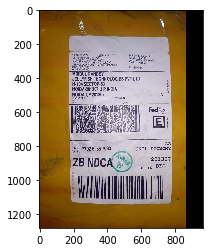

In [44]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


img=cv2.imread("rec.jpeg")
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

# plt.imshow(img)
# plt.show
print(img.shape)

height=img.shape[0]
width=img.shape[1]

# Specifying region of interest vertices.

# Generalized Case:
# CONSTRAINT:
# Camera should be same.
# Resolution of the image should be same.
# roi_vertices=[
#     (50,height-200),
#     (50,height/2),
#     (width-100,height/2), 
#     (width-100,height-200)
       
# ]

roi_vertices=[
    (0,height),
    (0,0),
    (width-100,0), 
    (width-100,height)
       
]



# Remember to specify coordinates in an order, Better will be clockwise.
# Bottom_left --> top_left --> top_right --> bottom_right.


def roi(img,vertices):
    mask=np.zeros_like(img)
    channel_count=img.shape[2]
    match_mask_color=(255,)*channel_count
    cv2.fillPoly(mask,vertices,match_mask_color)
    masked_image=cv2.bitwise_and(img,mask)
    return masked_image

cropped_image=roi(img,np.array([roi_vertices],np.int32))


plt.imshow(cropped_image)
plt.show

#cv2.imwrite('ROI.jpg',cropped_image)



In [2]:
import cv2
import numpy as np


img=cv2.imread("rec.jpeg")
dst = cv2.GaussianBlur(img,(5,5),cv2.BORDER_DEFAULT)
gray=cv2.cvtColor(dst,cv2.COLOR_BGR2GRAY)
edge=cv2.Canny(gray,50,150,apertureSize=3)

cv2.imwrite("a1.jpg",edge)
cv2.waitKey()


-1

### Edge Detection:

#### Without Gaussian Blur.


![](a.jpg)

### After Gaussian Blur.

![](a1.jpg)